<a href="https://colab.research.google.com/github/Rushi12bhalkar/Bank-Lone-Prediction-Using-Supervised-Machine-Learning/blob/main/Bank_Lone_Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# New bank loan prediction case study no. 3

import pandas as pd
import matplotlib.pyplot as plt

cols=['Loan_ID','Gender','Married','Dependents','Education',\
      'Self_Employed','ApplicantIncome','CoapplicantIncome',\
      'LoanAmount','Loan_Amount_Term','Credit_History',\
      'Property_Area','Loan_Status']
    
df = pd.read_csv(r'/content/train.csv')
print(df.shape) # no or rows and columns
print(df.head(10))
print(df.tail(10))
print(df.describe()) # statistical analysis


(614, 13)
    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y
5  LP001011   Male     Yes  ...            1.0         Urban           Y
6  LP001013   Male     Yes  ...            1.0         Urban           Y
7  LP001014   Male     Yes  ...            0.0     Semiurban           N
8  LP001018   Male     Yes  ...            1.0         Urban           Y
9  LP001020   Male     Yes  ...            1.0     Semiurban           N

[10 rows x 13 columns]
      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
604  LP002959  Female     Yes  ...            1.0     Semiurban           Y
605  LP0029

In [ ]:
# find missing values in dataset
for c in cols:
    print(c,df[c].isnull().sum()) # Loan_ID
    
# frequecny of data
    
print(df['Property_Area'].value_counts())
print(df['Credit_History'].value_counts())
print(df['Gender'].value_counts())
    

Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64


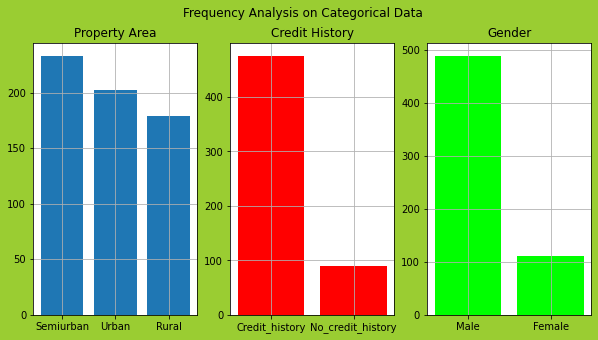

In [ ]:
# Data Visualization - 1. frequency analysis - Catagorical Variables
# Property_area, Credit_History, Gender

data1=['Semiurban','Urban','Rural'] # list for property area
data2=['Credit_history','No_credit_history'] # list for credit history

values1=df['Property_Area'].value_counts() # [233,202,179]
values2=df['Credit_History'].value_counts() # [475,89]

plt.figure(figsize=(10,5),facecolor='yellowgreen')
plt.suptitle('Frequency Analysis on Categorical Data')
plt.subplot(1,3,1)
plt.grid(True)
plt.bar(data1,values1)
plt.title('Property Area')

plt.subplot(1,3,2)
plt.title('Credit History')
plt.grid(True)
plt.bar(data2,values2,color='red')

plt.subplot(1,3,3)
data3=['Male','Female']
values3=df['Gender'].value_counts()
plt.grid(True)
plt.bar(data3,values3,color='lime')
plt.title('Gender')
plt.show()

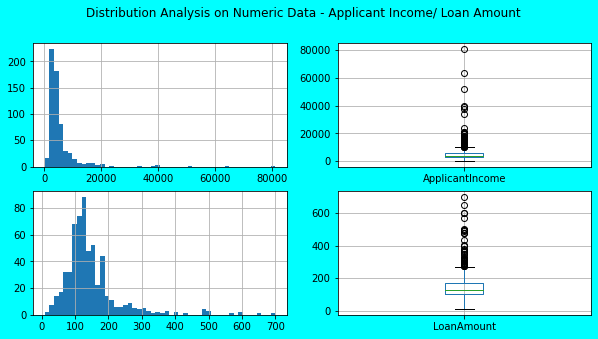

In [ ]:
# Data visualization - 2. Distribution Analysis - Numerical Variables
# ApplicantIncome, LoanAmount

plt.figure(figsize=(10,5),facecolor="cyan")
plt.suptitle('Distribution Analysis on Numeric Data - Applicant Income/ Loan Amount')
plt.subplot(2,2,1)
df['ApplicantIncome'].hist(bins=50)

plt.subplot(2,2,2)
df.boxplot(column='ApplicantIncome')

plt.subplot(2,2,3)
df['LoanAmount'].hist(bins=50)

plt.subplot(2,2,4)
df.boxplot(column='LoanAmount')



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

<Figure size 1080x576 with 0 Axes>

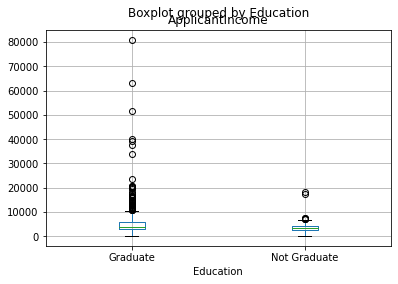

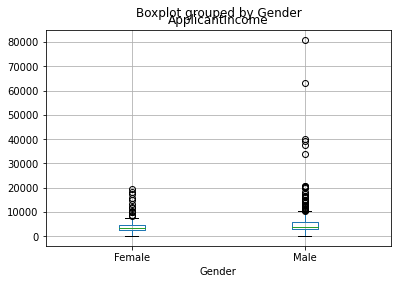

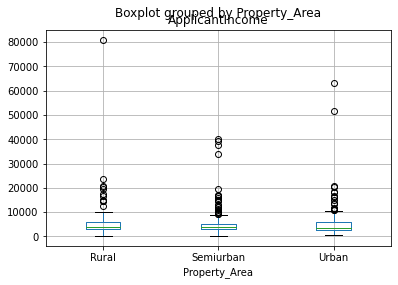

In [ ]:
# Data visualization - 3. Distribution Analysis - Numerical Variables
# Distribution analysis by Category
plt.figure(figsize=(15,8),facecolor='yellow')
df.boxplot(column='ApplicantIncome',  by='Education')
df.boxplot(column='ApplicantIncome', by='Gender')
df.boxplot(column='ApplicantIncome', by='Property_Area')
plt.show()



Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                7.865169
1.0               79.578947


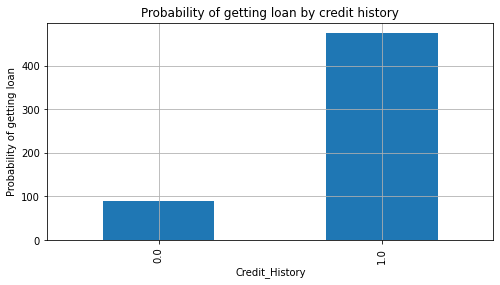

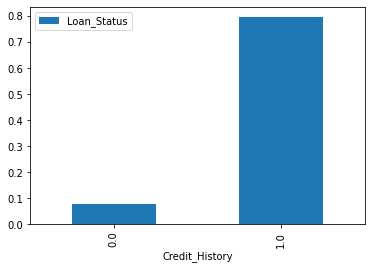

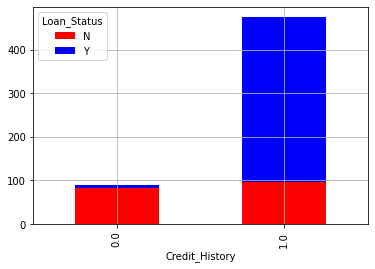

In [ ]:
# CVA - Categorical Variable Analysis using Pivot Table

t1 = df['Credit_History'].value_counts(ascending=True)
# count of Credit History on ascending order
# 1 - 680
# 0 - 301
# t1 = [ 301, 680 ]

t2 = df.pivot_table(values='Loan_Status', index=['Credit_History'],
aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (t1)
print ('Probability of getting loan for each Credit History class:')
print (t2*100)

fig = plt.figure(figsize=(8,4))

plt.xlabel('Credit_History')
plt.ylabel('Count of Applicants')
plt.grid(True)
plt.title("Applicants by Credit_History")
t1.plot(kind='bar')


plt.xlabel('Credit_History')
plt.ylabel('Probability of getting loan')
plt.grid(True)
plt.title("Probability of getting loan by credit history")
t2.plot(kind = 'bar')

temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cols=['Loan_ID','Gender','Married','Dependents','Education',\
      'Self_Employed','ApplicantIncome','CoapplicantIncome',\
      'LoanAmount','Loan_Amount_Term','Credit_History',\
      'Property_Area','Loan_Status']
    
df = pd.read_csv(r'/content/train.csv')
var = ['Gender','Married','Dependents','Education',\
       'Self_Employed','Property_Area','Loan_Status']

# find missing values in dataset

# the numeric missing values are replaced by the mean() of the column
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)


In [ ]:
# the categorical variables are replaced the mode() function of the column
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
print(df.apply(lambda x: sum(x.isnull()),axis=0))
# all missing data is now replaced.

# Converting data - categorical to numeric - Data Transformation
le = LabelEncoder()
print("Data Types before conversion ...")
print(df.dtypes)

for i in var:
    df[i] = le.fit_transform(df[i]) # fit_transform() converts data into numeric

print("Data Types After conversion...")
print(df.dtypes)





Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Data Types before conversion ...
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object
Data Types After conversion...
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       flo

In [44]:

# machine learning starts from here
feature_selection=['Credit_History','Property_Area','Gender'] # input variable
X = df[feature_selection] 
y = df['Loan_Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train = credit hist 80% *****
# y_test  = loan status 20%
# X_test  = credit hist 20%
# y_train = loan status 80% ***** 

# decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test) # 20% of credit hist
# prediction contains 20% loan status

# actual loan status from dataset vs predicted by the model
print(accuracy_score(y_test, prediction)*100)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print()
# naive bayes
model1 = SVC(gamma='auto')
model1.fit(X_train, y_train)
prediction1 = model1.predict(X_test) # 20% of credit hist
# prediction contains 20% loan status

# actual loan status from dataset vs predicted by the model
print(accuracy_score(y_test, prediction1)*100)
print(confusion_matrix(y_test, prediction1))
print(classification_report(y_test, prediction1))



80.48780487804879
[[13 24]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        37
           1       0.78      1.00      0.88        86

    accuracy                           0.80       123
   macro avg       0.89      0.68      0.70       123
weighted avg       0.85      0.80      0.77       123


80.48780487804879
[[13 24]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        37
           1       0.78      1.00      0.88        86

    accuracy                           0.80       123
   macro avg       0.89      0.68      0.70       123
weighted avg       0.85      0.80      0.77       123

